In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###Q1

In [0]:
def sample_2d(p,f,sig_x):
  x1 = np.random.uniform(-1,1)
  determinator = np.random.choice([True,False], p=(p,1-p))
  if determinator:
    eps = np.random.normal(0,sig_x)
    x2 = np.sin(f*x1) + eps
  else:
    x2 = np.random.uniform(-1,1)
  return pd.Series([x1, x2])

###Q2

In [0]:
p=0.95
f=4
sig_x=0.1
K=100
eta=1
sig=1

# setup
experiment = pd.DataFrame(np.column_stack((np.repeat(p,20000),np.repeat(f,20000),np.repeat(sig_x,20000))),
             columns=["p","f","sig_x"])

# sampling according to the parameters
experiment[["x1","x2"]] = experiment.apply(lambda row: sample_2d(row["p"],row["f"],row["sig_x"]), axis=1)
repres_mat = np.random.uniform(-1,1,size=(2,K))

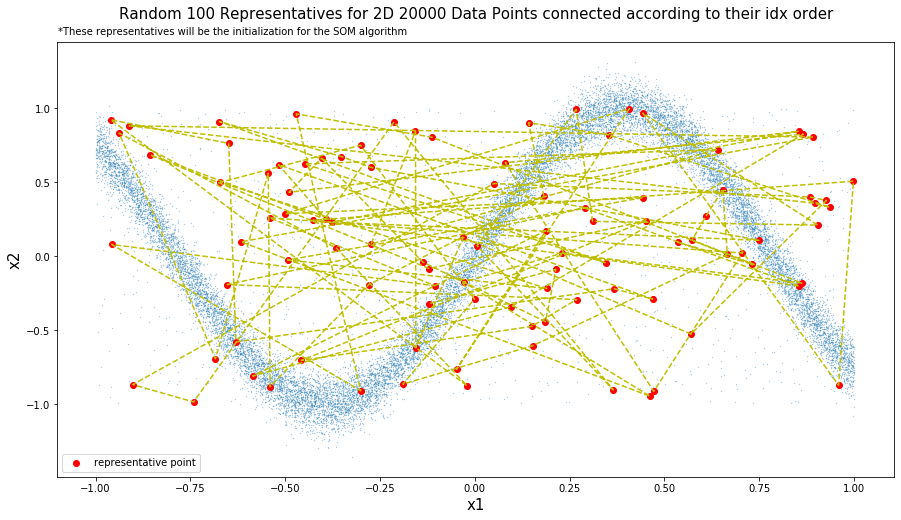

In [110]:
experiment[["x1","x2"]].plot(kind="scatter", x="x1", y="x2", s=0.1, alpha=0.5, figsize=(15,8))
plt.scatter(x=repres_mat[0],y=repres_mat[1], c="r", label="representative point")
plt.legend(loc="lower left")
plt.plot(repres_mat[0],repres_mat[1], c="y", linestyle="--")
plt.xlabel("x1" ,fontsize=15)
plt.ylabel("x2",fontsize=15)
plt.title("Random 100 Representatives for 2D 20000 Data Points connected according to their idx order\n", fontsize=15)
plt.text(x=-1.1,y=1.5,s="*These representatives will be the initialization for the SOM algorithm")
plt.show()

###Q3

In [0]:
for example in experiment[["x1","x2"]].values:
  exam_rep_diff = np.repeat(example,K).reshape(2,K) - repres_mat
  dists = np.apply_along_axis(np.linalg.norm,0, exam_rep_diff)
  l = np.argmin(dists)
  arg_for_pi = np.arange(repres_mat.shape[1]) - np.repeat(l,repeats=repres_mat.shape[1])  # 0 < arg+l < K-1
  pis = np.exp(-(arg_for_pi)**2/(2*(sig**2)))
  pis /= np.sum(pis)
  repres_mat += eta*exam_rep_diff*pis

###Q4

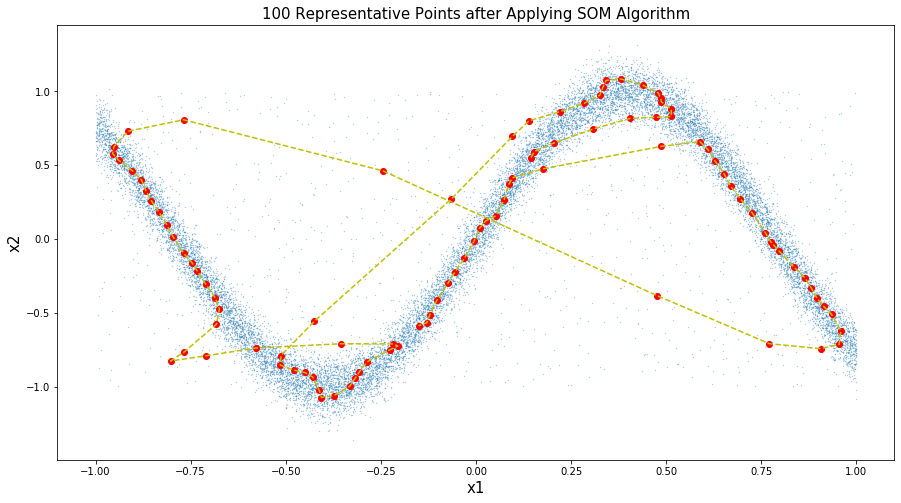

In [112]:
experiment[["x1","x2"]].plot(kind="scatter", x="x1", y="x2", s=0.1, alpha=0.5, figsize=(15,8))
plt.scatter(x=repres_mat[0],y=repres_mat[1], c="r", label="representative point")
plt.plot(repres_mat[0],repres_mat[1], c="y", linestyle="--")
plt.title("100 Representative Points after Applying SOM Algorithm", fontsize=15)
plt.xlabel("x1" ,fontsize=15)
plt.ylabel("x2",fontsize=15)
plt.show()

###Q5

**Seif a**\
SOM algo updates representative with close indecis in a similar way, as the pi function of the updating rule forces it. Therefore the yellow line is quite going from one representative to the next one (there is noice so there are few points that violate this). Basically, the distances between representative points are similar in the most of the time. This is because SOM force the K's points to represent the data, and the data is close to be uniform in the two dimensions. The data is simply uniform in the first dimension, and in the second it is spread most of the time on the sinus curve (with a small noise). The places in the data which violated the uniformity, produce representatives that violated the equal distances.

**Seif b**\
The magnitude of noise in the encoding doesn't affect the organization one after another of the representative, because the rule of close-idx-of-representatives update together doesn't change neither. However, the noise do affect the ability of the algo to assign representatives which will represent the data in a satisfy way, and therefore as the noise will increase the representatives will represent the examples in a bad way. 